# Embed a trivial 3 dimensional dataset to 2 dimensions

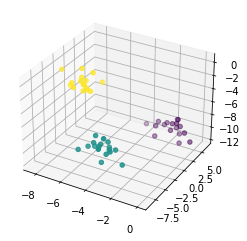

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=3, n_features=3, random_state=1)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

plt.show()

Epoch 1/5
2450/2450 [==============================] - 12s 5ms/step
Total loss: 25385.5859375
Epoch 2/5
2450/2450 [==============================] - 13s 5ms/step
Total loss: 3956.677978515625
Epoch 3/5
2450/2450 [==============================] - 14s 6ms/step
Total loss: 798.6407470703125
Epoch 4/5
2450/2450 [==============================] - 14s 6ms/step
Total loss: 701.3309326171875
Epoch 5/5
2450/2450 [==============================] - 14s 6ms/step
Total loss: 598.0669555664062


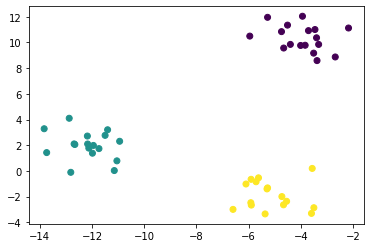

In [2]:
from saepipe import EmbeddingPipeline
from numpy.linalg import norm
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(2))
model.compile(optimizer='adam', loss='mean_squared_error')

difference = lambda a, b: norm(a - b)
pipeline = EmbeddingPipeline(model, 2).train(difference, X, epochs=5)

X_embed = pipeline.embed(X)

fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_embed[:, 0], X_embed[:, 1], c=y)

plt.show()